# Leaky Integrate-and-Fire (LIF) Model Simulation

**Yeu cau:** Simulate the change in the membrane potential of a neuron when it receives a square wave input current using the LIF model.  
**Output:** Membrane potential plot + Spike detection + Animation + Analysis

## Setup: Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import HTML, display
import matplotlib as mpl

# Enable inline plotting
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Fix animation embed limit
mpl.rcParams['animation.embed_limit'] = 50

# Output directory
OUTPUT_DIR = r'C:\Users\ducmi\OneDrive\Desktop\(29-12--04-01)TinhToanKhoaHocThanKinhVaUngDung\Quiz\HH-LIF-Reservoir-Simulation\Output'

print("Libraries loaded successfully")
print(f"Output directory: {OUTPUT_DIR}")

Libraries loaded successfully
Output directory: C:\Users\ducmi\OneDrive\Desktop\(29-12--04-01)TinhToanKhoaHocThanKinhVaUngDung\Quiz\HH-LIF-Reservoir-Simulation\Output


## Step 1: Define LIF parameters

In [2]:
# ============ LIF PARAMETERS ============
C_m = 1.0           # Membrane capacitance (uF/cm^2)
g_L = 0.1           # Leak conductance (mS/cm^2)
E_L = -65.0         # Resting potential (mV)
V_threshold = -50.0 # Spike threshold (mV)
V_reset = -70.0     # Reset potential (mV)
V_spike = 40.0      # Spike peak for visualization (mV)
t_ref = 2.0         # Refractory period (ms)
V_0 = E_L           # Initial potential (mV)
tau_m = C_m / g_L   # Membrane time constant (ms)

print("LIF MODEL PARAMETERS:")
print(f"  C_m = {C_m} uF/cm^2")
print(f"  g_L = {g_L} mS/cm^2")
print(f"  E_L = {E_L} mV")
print(f"  tau_m = {tau_m} ms")
print(f"  V_threshold = {V_threshold} mV")
print(f"  V_reset = {V_reset} mV")
print(f"  t_ref = {t_ref} ms")

LIF MODEL PARAMETERS:
  C_m = 1.0 uF/cm^2
  g_L = 0.1 mS/cm^2
  E_L = -65.0 mV
  tau_m = 10.0 ms
  V_threshold = -50.0 mV
  V_reset = -70.0 mV
  t_ref = 2.0 ms


## Step 2: Create square wave input current

In [3]:
# Time parameters
t_start = 0.0
t_end = 200.0
dt = 0.1
t = np.arange(t_start, t_end, dt)

# Square wave parameters
I_amplitude = 2.0   # Current amplitude (uA/cm^2)
I_period = 50.0     # Period (ms)
I_duty = 0.5        # Duty cycle (50%)
I_start = 10.0      # Start time (ms)

def create_square_wave(t, amplitude, period, duty_cycle, start_time):
    """Create square wave input current"""
    I_ext = np.zeros_like(t)
    for i, time in enumerate(t):
        if time >= start_time:
            phase = ((time - start_time) % period) / period
            if phase < duty_cycle:
                I_ext[i] = amplitude
    return I_ext

I_ext = create_square_wave(t, I_amplitude, I_period, I_duty, I_start)

print("SQUARE WAVE INPUT:")
print(f"  Amplitude = {I_amplitude} uA/cm^2")
print(f"  Period = {I_period} ms")
print(f"  Duty cycle = {I_duty*100}%")
print(f"  Start time = {I_start} ms")

SQUARE WAVE INPUT:
  Amplitude = 2.0 uA/cm^2
  Period = 50.0 ms
  Duty cycle = 50.0%
  Start time = 10.0 ms


## Step 3: Simulate LIF model

In [4]:
# Initialize arrays
V = np.zeros(len(t))
V[0] = V_0
spike_times = []
refractory_end = 0

print("Running LIF simulation...")

# Euler method integration
for i in range(1, len(t)):
    # Check if in refractory period
    if t[i] < refractory_end:
        V[i] = V_reset
        continue
    
    # LIF equation: C_m * dV/dt = -g_L(V - E_L) + I_ext
    dVdt = (-g_L * (V[i-1] - E_L) + I_ext[i-1]) / C_m
    V[i] = V[i-1] + dVdt * dt
    
    # Check for spike
    if V[i] >= V_threshold:
        spike_times.append(t[i])
        V[i] = V_spike  # Set to spike peak for visualization
        refractory_end = t[i] + t_ref

spike_times = np.array(spike_times)

print(f"Simulation complete: {len(t)} time points")
print(f"Number of spikes: {len(spike_times)}")
if len(spike_times) > 0:
    print(f"First spike: {spike_times[0]:.2f} ms")
    print(f"Last spike: {spike_times[-1]:.2f} ms")
    print(f"Firing rate: {len(spike_times) / (t_end/1000):.2f} Hz")

Running LIF simulation...
Simulation complete: 2000 time points
Number of spikes: 4
First spike: 23.80 ms
Last spike: 173.40 ms
Firing rate: 20.00 Hz


## Step 4: Static plots (V and Input Current)

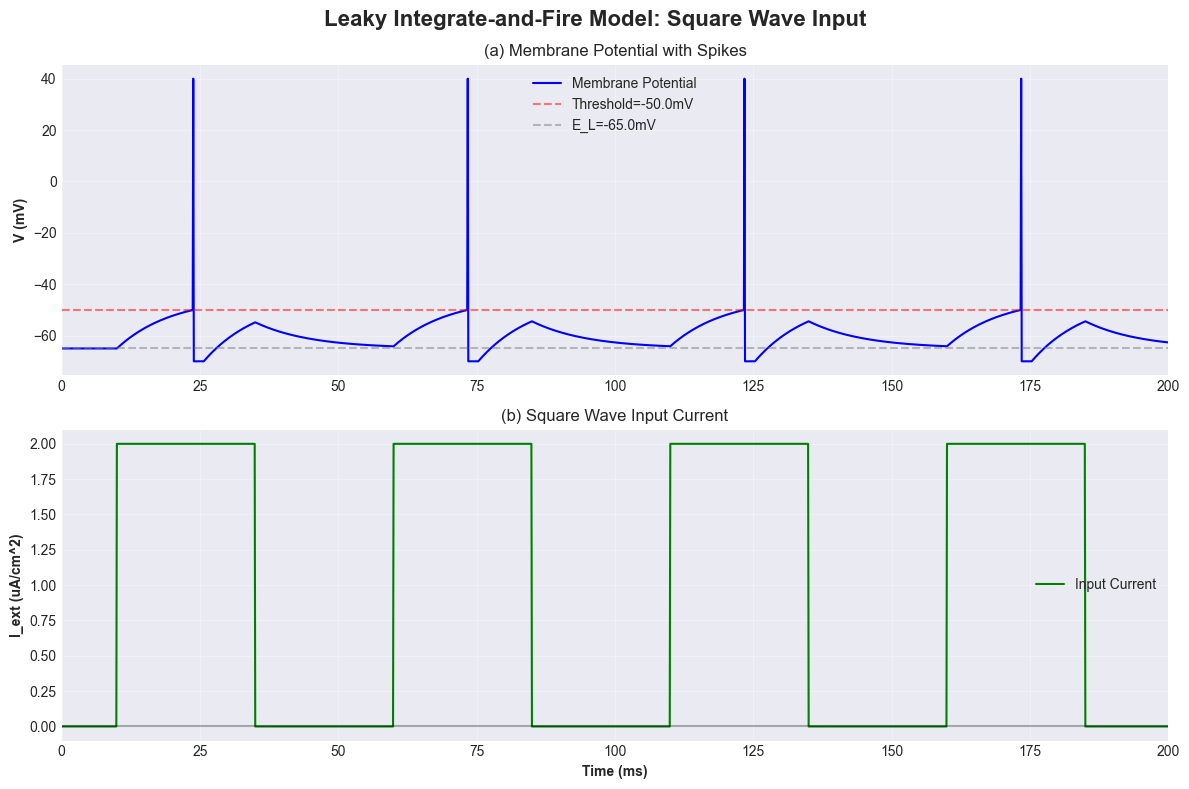

Static plots saved to: C:\Users\ducmi\OneDrive\Desktop\(29-12--04-01)TinhToanKhoaHocThanKinhVaUngDung\Quiz\HH-LIF-Reservoir-Simulation\Output\lif_static_plots.png


In [5]:
import os

fig, axes = plt.subplots(2, 1, figsize=(12, 8))
fig.suptitle('Leaky Integrate-and-Fire Model: Square Wave Input', fontsize=16, fontweight='bold')

# Membrane potential
axes[0].plot(t, V, 'b-', linewidth=1.5, label='Membrane Potential')
axes[0].axhline(V_threshold, color='r', linestyle='--', alpha=0.5, label=f'Threshold={V_threshold}mV')
axes[0].axhline(E_L, color='gray', linestyle='--', alpha=0.5, label=f'E_L={E_L}mV')
axes[0].set_ylabel('V (mV)', fontweight='bold')
axes[0].set_title('(a) Membrane Potential with Spikes')
axes[0].legend()
axes[0].grid(alpha=0.3)
axes[0].set_xlim([0, t_end])

# Input current
axes[1].plot(t, I_ext, 'g-', linewidth=1.5, label='Input Current')
axes[1].axhline(0, color='k', linestyle='-', alpha=0.3)
axes[1].set_xlabel('Time (ms)', fontweight='bold')
axes[1].set_ylabel('I_ext (uA/cm^2)', fontweight='bold')
axes[1].set_title('(b) Square Wave Input Current')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_xlim([0, t_end])

plt.tight_layout()

output_path = os.path.join(OUTPUT_DIR, 'lif_static_plots.png')
plt.savefig(output_path, dpi=150, bbox_inches='tight')
plt.show()

print(f"Static plots saved to: {output_path}")

## Step 5: Animation - Membrane potential evolution (chay truc tiep trong notebook)

In [6]:
# Create animation
fig_anim, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7))

# Setup axes
ax1.set_xlim(0, t_end)
ax1.set_ylim(-75, 50)
ax1.set_ylabel('V (mV)', fontweight='bold')
ax1.set_title('LIF Model Animation', fontweight='bold')
ax1.grid(alpha=0.3)
ax1.axhline(V_threshold, color='r', linestyle='--', alpha=0.5, label='Threshold')
ax1.axhline(E_L, color='gray', linestyle='--', alpha=0.5, label='E_L')
ax1.legend(loc='upper right')

ax2.set_xlim(0, t_end)
ax2.set_ylim(-0.5, 2.5)
ax2.set_xlabel('Time (ms)', fontweight='bold')
ax2.set_ylabel('I_ext (uA/cm^2)', fontweight='bold')
ax2.grid(alpha=0.3)

line_v, = ax1.plot([], [], 'b-', linewidth=2)
point_v, = ax1.plot([], [], 'ro', markersize=8)
line_i, = ax2.plot([], [], 'g-', linewidth=2)

time_text = ax1.text(0.02, 0.95, '', transform=ax1.transAxes, fontsize=11,
                     verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

def init():
    line_v.set_data([], [])
    point_v.set_data([], [])
    line_i.set_data([], [])
    time_text.set_text('')
    return line_v, point_v, line_i, time_text

def animate(frame):
    idx = frame * 20  # Update every 20 frames
    if idx >= len(t):
        idx = len(t) - 1
    
    line_v.set_data(t[:idx], V[:idx])
    point_v.set_data([t[idx]], [V[idx]])
    line_i.set_data(t[:idx], I_ext[:idx])
    time_text.set_text(f't = {t[idx]:.1f} ms\nV = {V[idx]:.1f} mV')
    return line_v, point_v, line_i, time_text

print("Creating animation...")
anim = FuncAnimation(fig_anim, animate, init_func=init,
                    frames=len(t)//20, interval=20, blit=True, repeat=True)

print("Displaying animation below...")
display(HTML(anim.to_jshtml()))
plt.close()

# Save GIF
print("Saving GIF...")
gif_path = os.path.join(OUTPUT_DIR, 'lif_animation.gif')
writer = PillowWriter(fps=30)
anim.save(gif_path, writer=writer)
print(f"Animation saved to: {gif_path}")

Creating animation...
Displaying animation below...


Saving GIF...
Animation saved to: C:\Users\ducmi\OneDrive\Desktop\(29-12--04-01)TinhToanKhoaHocThanKinhVaUngDung\Quiz\HH-LIF-Reservoir-Simulation\Output\lif_animation.gif


## Step 6: Interactive plot (Plotly - chay truc tiep trong notebook)

In [7]:
# Create interactive subplot
fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=('Membrane Potential', 'Input Current'),
    vertical_spacing=0.12
)

# Membrane potential
fig.add_trace(go.Scatter(x=t, y=V, mode='lines', name='V', line=dict(color='blue', width=1.5)), row=1, col=1)
fig.add_trace(go.Scatter(x=t, y=[V_threshold]*len(t), mode='lines', name='Threshold',
                        line=dict(color='red', width=1, dash='dash')), row=1, col=1)

# Input current
fig.add_trace(go.Scatter(x=t, y=I_ext, mode='lines', name='I_ext',
                        line=dict(color='green', width=1.5)), row=2, col=1)

# Update layout
fig.update_xaxes(title_text="Time (ms)", row=2, col=1)
fig.update_yaxes(title_text="V (mV)", row=1, col=1)
fig.update_yaxes(title_text="I_ext (uA/cm^2)", row=2, col=1)

fig.update_layout(
    height=700,
    title_text="LIF Model - Interactive Visualization",
    showlegend=True,
    hovermode='x unified'
)

fig.show()

# Save HTML
html_path = os.path.join(OUTPUT_DIR, 'lif_interactive.html')
fig.write_html(html_path)
print(f"Interactive plot saved to: {html_path}")

Interactive plot saved to: C:\Users\ducmi\OneDrive\Desktop\(29-12--04-01)TinhToanKhoaHocThanKinhVaUngDung\Quiz\HH-LIF-Reservoir-Simulation\Output\lif_interactive.html


## Step 7: Analysis - Spike statistics & ISI

In [8]:
print("="*70)
print("LIF MODEL ANALYSIS")
print("="*70)
print()

print("SPIKE STATISTICS:")
print(f"  Total spikes: {len(spike_times)}")
if len(spike_times) > 0:
    print(f"  First spike: {spike_times[0]:.2f} ms")
    print(f"  Last spike: {spike_times[-1]:.2f} ms")
    print(f"  Firing rate: {len(spike_times) / (t_end/1000):.2f} Hz")
    
    if len(spike_times) > 1:
        isi = np.diff(spike_times)
        print()
        print("INTER-SPIKE INTERVAL (ISI):")
        print(f"  Mean ISI: {np.mean(isi):.2f} ms")
        print(f"  Min ISI: {np.min(isi):.2f} ms")
        print(f"  Max ISI: {np.max(isi):.2f} ms")
        print(f"  Std ISI: {np.std(isi):.2f} ms")

print()
print("MEMBRANE POTENTIAL STATISTICS:")
print(f"  Initial V: {V[0]:.2f} mV")
print(f"  Mean V: {np.mean(V):.2f} mV")
print(f"  Max V: {np.max(V):.2f} mV")
print(f"  Min V: {np.min(V):.2f} mV")

print()
print("LIF MODEL BEHAVIOR:")
print("  - When I_ext > 0: V integrates current and increases")
print("  - When V >= V_threshold: Neuron fires (spike)")
print("  - After spike: V resets to V_reset")
print("  - Refractory period: No spiking for t_ref ms")
print("  - When I_ext = 0: V decays back to E_L (leak)")
print()
print("="*70)

LIF MODEL ANALYSIS

SPIKE STATISTICS:
  Total spikes: 4
  First spike: 23.80 ms
  Last spike: 173.40 ms
  Firing rate: 20.00 Hz

INTER-SPIKE INTERVAL (ISI):
  Mean ISI: 49.87 ms
  Min ISI: 49.60 ms
  Max ISI: 50.00 ms
  Std ISI: 0.19 ms

MEMBRANE POTENTIAL STATISTICS:
  Initial V: -65.00 mV
  Mean V: -59.85 mV
  Max V: 40.00 mV
  Min V: -70.00 mV

LIF MODEL BEHAVIOR:
  - When I_ext > 0: V integrates current and increases
  - When V >= V_threshold: Neuron fires (spike)
  - After spike: V resets to V_reset
  - Refractory period: No spiking for t_ref ms
  - When I_ext = 0: V decays back to E_L (leak)



## Summary

**Completed:**
1. Defined LIF model parameters (C_m, g_L, E_L, V_threshold, V_reset, t_ref)
2. Created square wave input current
3. Simulated membrane potential evolution with spike detection
4. Plotted V and I_ext over time
5. Created **inline animation** (V and I_ext) + saved GIF
6. Created **inline interactive plot** (Plotly) + saved HTML
7. Analyzed spike statistics and ISI

**Key findings:**
- LIF model integrates input current and fires when reaching threshold
- Refractory period prevents immediate re-firing
- Leak current pulls V back to resting potential

**Output files saved to:**  
`C:\Users\ducmi\OneDrive\Desktop\(29-12--04-01)TinhToanKhoaHocThanKinhVaUngDung\Quiz\HH-LIF-Reservoir-Simulation\Output`